# HomeWork 1 SPA631M Statistics

Name : Ashwin

Rollno : 241310004


In [1]:
# Import Dependecies
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator
from scipy.stats import norm

## Q1 :
A fundamental characteristic of a plasma is its ability to shield out electric potentials applied to it. The Debye length (λD ) is a measure of the distance over which significant electrostatic interactions occur in a plasma, electrolyte, or any medium with free charge carriers (such as ions), and is given by,

$$ \lambda_D = \sqrt{\frac{\epsilon_0 k_B  T}{n_e e^2} } $$

where ne is the electron density, T is the temperature.


### (a) 
Compute the rate of the Debye shielding radius with a change in the density of the plasma.
For a constant temperature of T = 1 MK, plot the rate vs the plasma density.

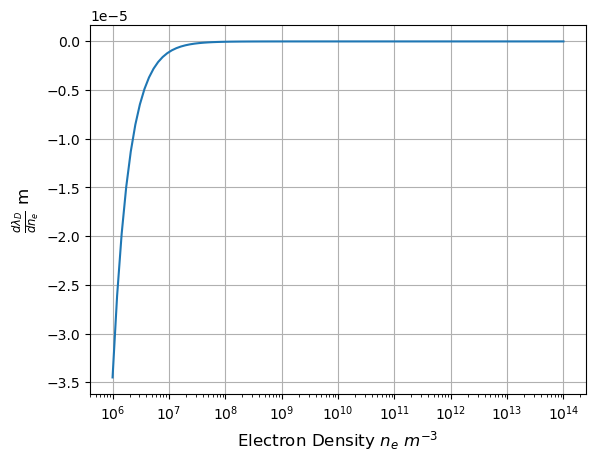

In [2]:
episilon_0 = sp.constants.epsilon_0
k_B = sp.constants.k
T = 1 * 10**6 #Kelvin
e = sp.constants.e

def debye_Radius(n_e,T):
    return np.sqrt(episilon_0*k_B*T/(n_e*pow(e,2) ) )

def dlambda_dne(n_e,T):
    return ( np.sqrt(episilon_0*k_B*T)/e *-1/2 * pow(n_e,-3/2) )

n_e_range = np.logspace(6, 14, 100)

plt.plot(n_e_range,dlambda_dne(n_e_range,T))
plt.xscale('log')
plt.xlabel(r'Electron Density $n_e$ $m^{-3}$', fontsize=12)
plt.ylabel(r"$\frac{d\lambda_D}{dn_e}$ m", fontsize=12)
#plt.title('Rate of Debye Shielding Radius vs Plasma Density', fontsize=14)
plt.grid(True)
plt.show()



### (b) 
Consider both ne and T as variable, plot a surface 3-D map for the Debye length. Write the
differential for the Debye length λD (ne , T )?


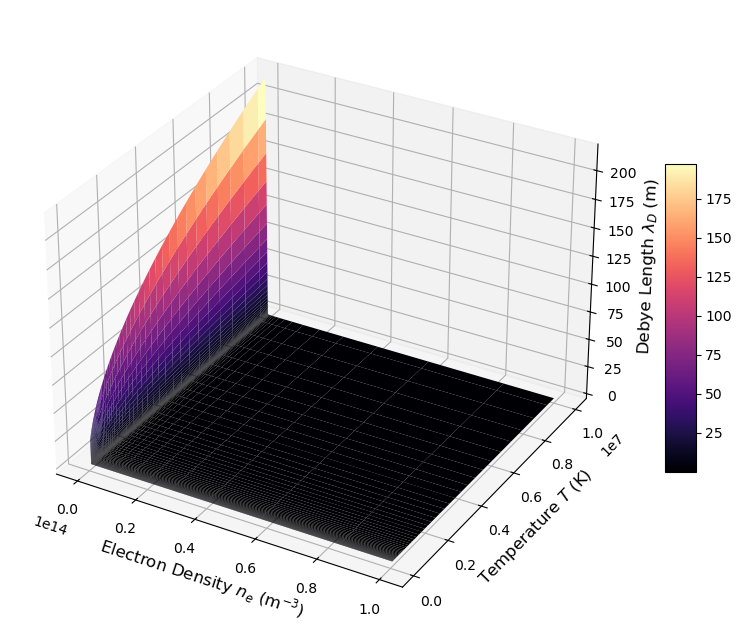

In [3]:
T_range = np.logspace(5,7, 100)
n_e_range = np.logspace(6, 14, 100)
T_grid, ne_grid = np.meshgrid(T_range, n_e_range)

debye_radius_grid =  debye_Radius(ne_grid,T_grid)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(ne_grid, T_grid, debye_radius_grid, cmap='magma')
ax.set_xlabel('Electron Density $n_e$ (m$^{-3}$)', fontsize=12)
ax.set_ylabel('Temperature $T$ (K)', fontsize=12)
ax.set_zlabel('Debye Length $\lambda_D$ (m)', fontsize=12)
#ax.set_title('3D Surface Plot of Debye Length', fontsize=14)
#ax.set_xscale("log")
#ax.set_yscale("log")
plt.colorbar(surf, shrink=0.5, aspect=10)
plt.show()




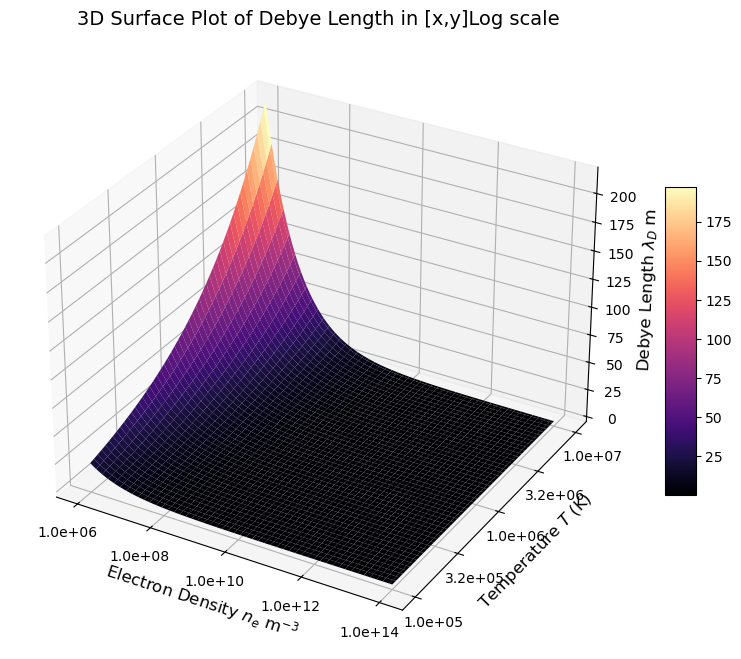

In [4]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

log_ne_grid = np.log10(ne_grid)
log_T_grid = np.log10(T_grid)

surf = ax.plot_surface(log_ne_grid, log_T_grid, debye_radius_grid, cmap='magma')

ax.set_xlabel(r'Electron Density $n_e$ m$^{-3}$', fontsize=12)
ax.set_ylabel(r'Temperature $T$ (K)', fontsize=12)
ax.set_zlabel(r'Debye Length $\lambda_D$ m', fontsize=12)
ax.set_title(r'3D Surface Plot of Debye Length in [x,y]Log scale', fontsize=14)

original_ne_ticks = np.logspace(6,14, 5)
original_T_ticks = np.logspace(5,7, 5)

log_ne_ticks = np.log10(original_ne_ticks)
log_T_ticks = np.log10(original_T_ticks)


ax.set_xticks(log_ne_ticks)
ax.set_xticklabels([f'{val:.1e}' for val in original_ne_ticks])

ax.set_yticks(log_T_ticks)
ax.set_yticklabels([f'{val:.1e}' for val in original_T_ticks])

plt.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


### (c) 
An instrument on a measuring Debye length by measuring electron density is put on a spacecraft traveling on a 10 day journey from interplanetry medium to the Sun. The instrument measures following data points at different times, are there any illegitimate errors and why? 10 data points measured are ne = [1.35e6, 1.11e7, 1.34e13, 1.11e7, 1.08e4, 3.1e6, 0.6e6, 4.9e6, 5.4e8, 9.8e8, 5.5e10 ] cm−3
taken on t = [0, 0.45, 1.22, 1.84, 1.47, 2.10, 2.01, 2.54, 4, 9, 10] days respectively.


1350000.0 in 
11100000.0 in 
13400000000000.0  out
11100000.0 in 
10800.0 in 
3100000.0 in 
600000.0 in 
4900000.0 in 
540000000.0 in 
980000000.0 in 
55000000000.0 in 


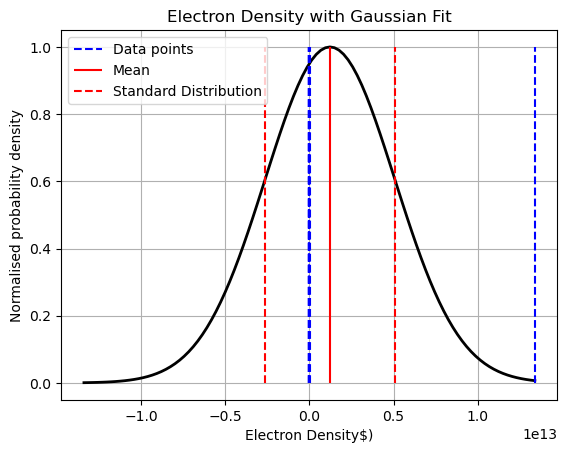

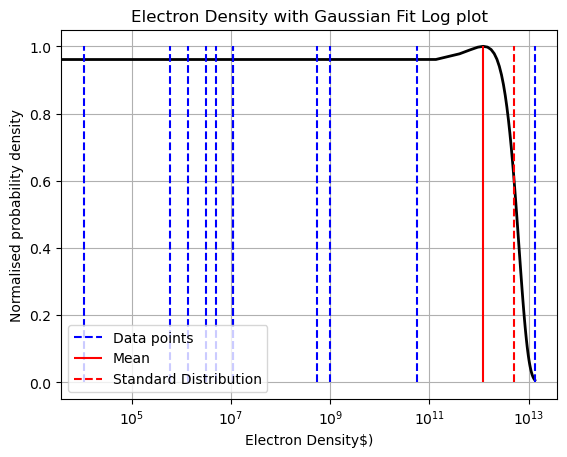

In [5]:

ne = np.array([1.35e6, 1.11e7, 1.34e13, 1.11e7, 1.08e4, 3.1e6, 0.6e6, 4.9e6, 5.4e8, 9.8e8, 5.5e10])
t = np.array([0, 0.45, 1.22, 1.84, 1.47, 2.10, 2.01, 2.54, 4, 9, 10])  # days

xmax = max(ne)
mu, std = norm.fit(ne)

for i in ne:
    if i <= (mu+std) and i >= (mu-std):
        print(f"{i} in ")
    else:
        print(f"{i}  out")




plt.figure()
x = np.linspace(-xmax, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p/(max(p)), 'k', linewidth=2)
plt.vlines(ne,ymin = 0, ymax = 1, color = "b",ls="dashed",label = "Data points")
plt.vlines(np.mean(ne),ymin = 0, ymax = 1, color = "r",ls="solid",label = "Mean")
plt.vlines(np.mean(ne)+np.std(ne),ymin = 0, ymax = 1, color = "r",ls="dashed",label = "Standard Distribution")
plt.vlines(np.mean(ne)-np.std(ne),ymin = 0, ymax = 1, color = "r",ls="dashed")
plt.ylabel('Normalised probability density')
plt.xlabel('Electron Density$)')
plt.title('Electron Density with Gaussian Fit')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
x = np.linspace(-xmax, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p/(max(p)), 'k', linewidth=2)
plt.vlines(ne,ymin = 0, ymax = 1, color = "b",ls="dashed",label = "Data points")
plt.vlines(np.mean(ne),ymin = 0, ymax = 1, color = "r",ls="solid",label = "Mean")
plt.vlines(np.mean(ne)+np.std(ne),ymin = 0, ymax = 1, color = "r",ls="dashed",label = "Standard Distribution")
plt.vlines(np.mean(ne)-np.std(ne),ymin = 0, ymax = 1, color = "r",ls="dashed")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.ylabel('Normalised probability density')
plt.xlabel('Electron Density$)')
plt.title('Electron Density with Gaussian Fit Log plot')
plt.show()

### (d) 
Compute the mean, median, standard deviation and mode of the Debye length numerically.
Explain the steps. For this, do not use build-in python libraries.

In [6]:
def mean(num_list):
    n = len(num_list)
    sum = 0
    for i in num_list:
        sum+=i
    return sum/n

def median(num_list):
    num_list=np.sort(num_list)
    n = len(num_list)
    if n%2 == 0: #even
        return ( num_list[int(n/2-1)]+num_list[int(n/2-1)] )/2
    if n%2 != 0: #odd
        return num_list[int((n+1)/2-1)]
    

def std_dev(num_list):

    n = len(num_list)
    mu = mean(num_list)
    sum = 0
    for i in num_list:
        sum += pow(i-mu ,2)
    sigma = np.sqrt( sum/n)
    return sigma

def mode_n(num_list):
    num_list = np.sort(num_list)
    numbers_freq = {}
    for i in num_list:
        if i in numbers_freq:
            numbers_freq[i] += 1
        else:
            numbers_freq[i] = 1
    return float(max(numbers_freq, key=numbers_freq.get))


ne = np.array([1.35e6, 1.11e7, 1.34e13, 1.11e7, 1.08e4, 3.1e6, 0.6e6, 4.9e6, 5.4e8, 9.8e8, 5.5e10 ] )

print("Mean of n_e ={:.10e} ; error[compared to numpy] = {} ".format(mean(ne) , mean(ne)-np.mean(ne)))
print("Median of n_e ={:.10e} ; error[compared to numpy] = {} ".format(median(ne) , median(ne)-np.median(ne)))
print("Standard Deviation of n_e ={:.10e} ; error[compared to numpy] = {} ".format(std_dev(ne) , std_dev(ne)-np.std(ne)))
print("Mode of n_e ={:.2e} ; error[compared to sympy] = {} ".format(mode_n(ne) , mode_n(ne)-sp.stats.mode(ne)[0]))


Mean of n_e =1.2233229237e+12 ; error[compared to numpy] = 0.0 
Median of n_e =1.1100000000e+07 ; error[compared to numpy] = 0.0 
Standard Deviation of n_e =3.8506353374e+12 ; error[compared to numpy] = 0.0 
Mode of n_e =1.11e+07 ; error[compared to sympy] = 0.0 


## Q 3 
Using the given image of a coronal mass ejection (‘CME.jpg’). Using PIL python library, read the image and display the “R” (red), “G” (green) and “B” (blue) component of the images.

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

red_cmap = LinearSegmentedColormap.from_list("black_to_red", [(0, "black"), (1, "red")])
green_cmap = LinearSegmentedColormap.from_list("black_to_green", [(0, "black"), (1, "green")])
blue_cmap = LinearSegmentedColormap.from_list("black_to_blue", [(0, "black"), (1, "blue")])


### (a)
 Comment on the features you observe in the “R”, “G” and “B”. Why do you observe the differences?

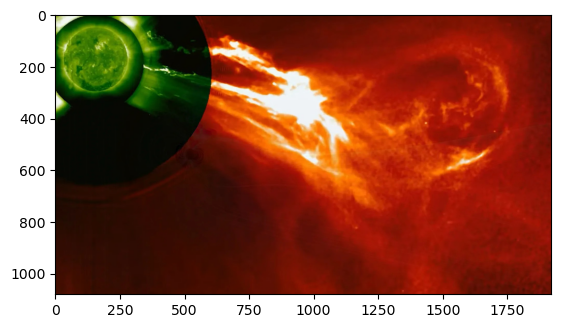

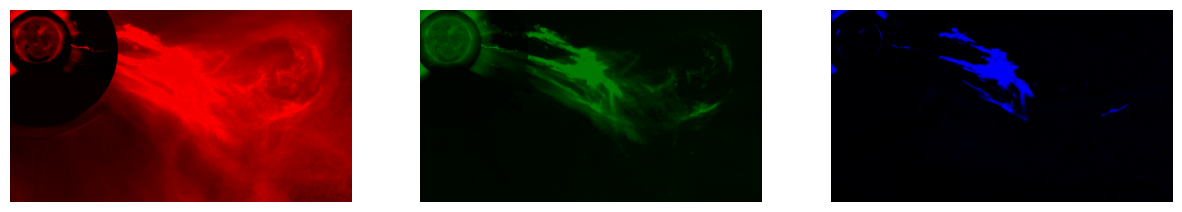

In [8]:
im = Image.open('CME.jpg') # Read the image
image = np.array (im, dtype=np.float32) # Convert the image object into data array
plt.imshow(im)

Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

Images = [Red,Green,Blue]
cmaps = [red_cmap,green_cmap,blue_cmap]
name = ["Red","Green","Blue"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    axes[i].imshow(Images[i], cmap=cmaps[i])
    axes[i].axis('off')
plt.show()

### (b) 
Plot the distribution of the each component. Comment on the difference and their origin.

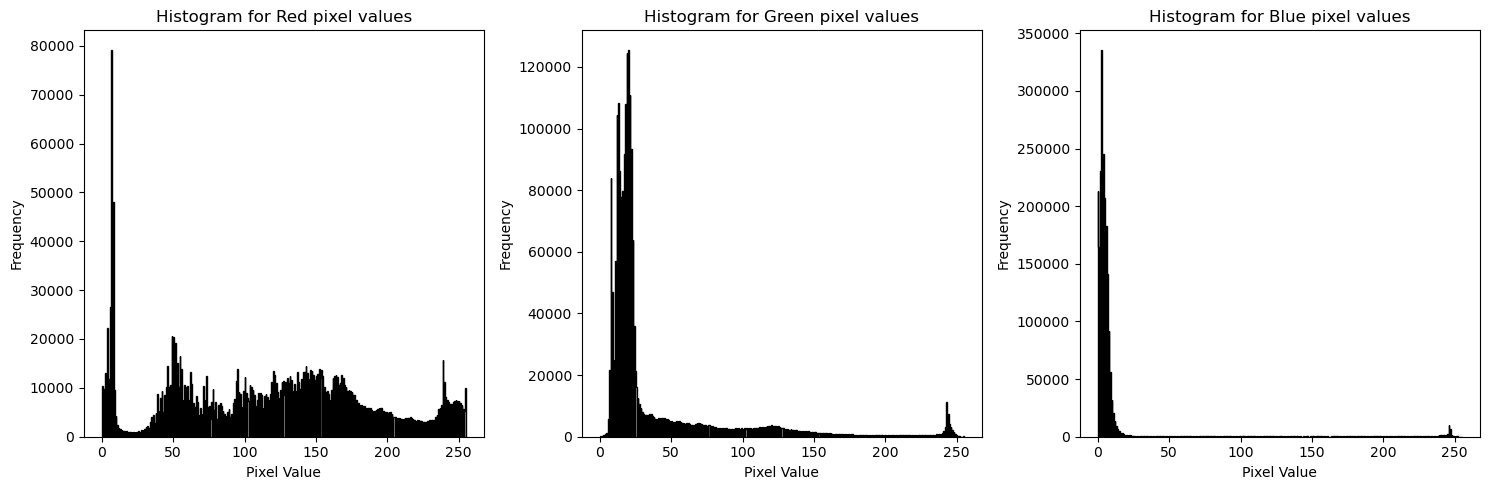

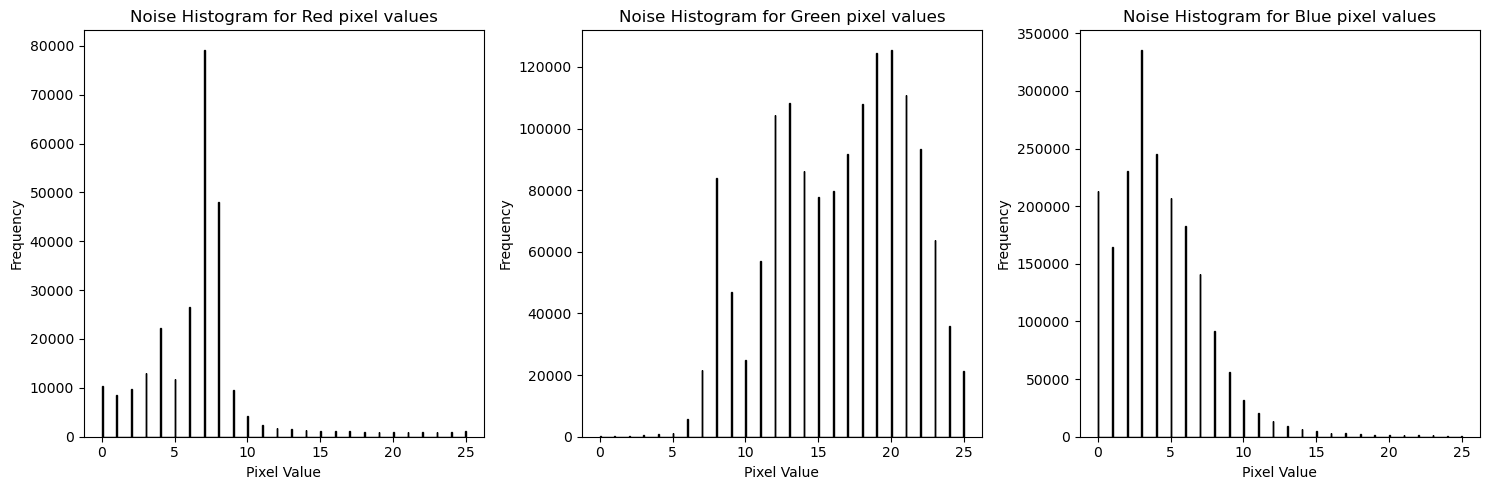

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    image_data = Images[i]
    mean = np.mean(image_data)
    std = np.std(image_data)
    var = np.var(image_data)
    median = np.median(image_data)
    rms = np.sqrt(np.mean(np.square(image_data)))
    RMS = np.sqrt(np.square(np.mean(image_data)) + np.var(image_data))

    # Seting bin 500 as to not bin the data.
    axes[i].hist(image_data.ravel(), bins=500, histtype='step', color='black')
    #axes[i].set_yscale("log")
    axes[i].set_title(f"Histogram for {name[i]} pixel values")
    axes[i].set_xlabel("Pixel Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    image_data = Images[i]
    mean = np.mean(image_data)
    std = np.std(image_data)
    var = np.var(image_data)
    median = np.median(image_data)
    rms = np.sqrt(np.mean(np.square(image_data)))
    RMS = np.sqrt(np.square(np.mean(image_data)) + np.var(image_data))

    # Seting bin 500 as to not bin the data.
    #axes[i].hist(image_data.ravel(), bins=500, range=[mean - std, mean + std],histtype='step', color='black')
    axes[i].hist(image_data.ravel(), bins=500, range=[0,25],histtype='step', color='black')

    #axes[i].set_yscale("log")
    axes[i].set_title(f"Noise Histogram for {name[i]} pixel values")
    axes[i].set_xlabel("Pixel Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### (C) 
Take a photograph from your cellphone of the sky in the afternoon. Repeat (a) and (b) process for your image. What differences between component distributions you observe and why?

### Answer And Explanation : 
In the Following we histogram plot we see Two type of distribution One because of the Noise and the other is because of the information from the scean. 

The Noise distribution approx between the pixal value 25 to 75 following a Gaussian distribution as expected from the noise data captured by the pixals
and the scean information does not follow a specific distribution and is depended on the object in the scean, like the sunlight, clouds, trees or anyother object captured in the image.   

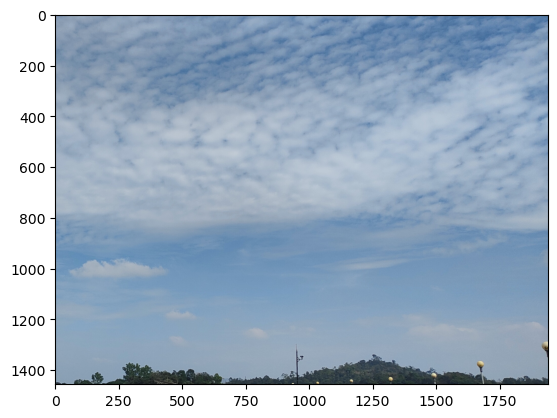

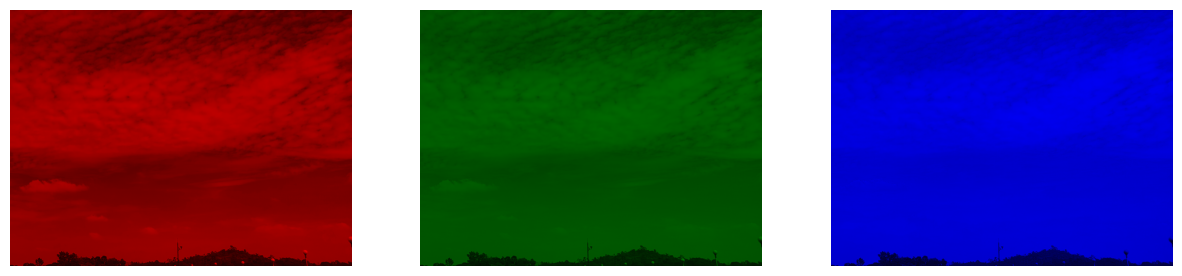

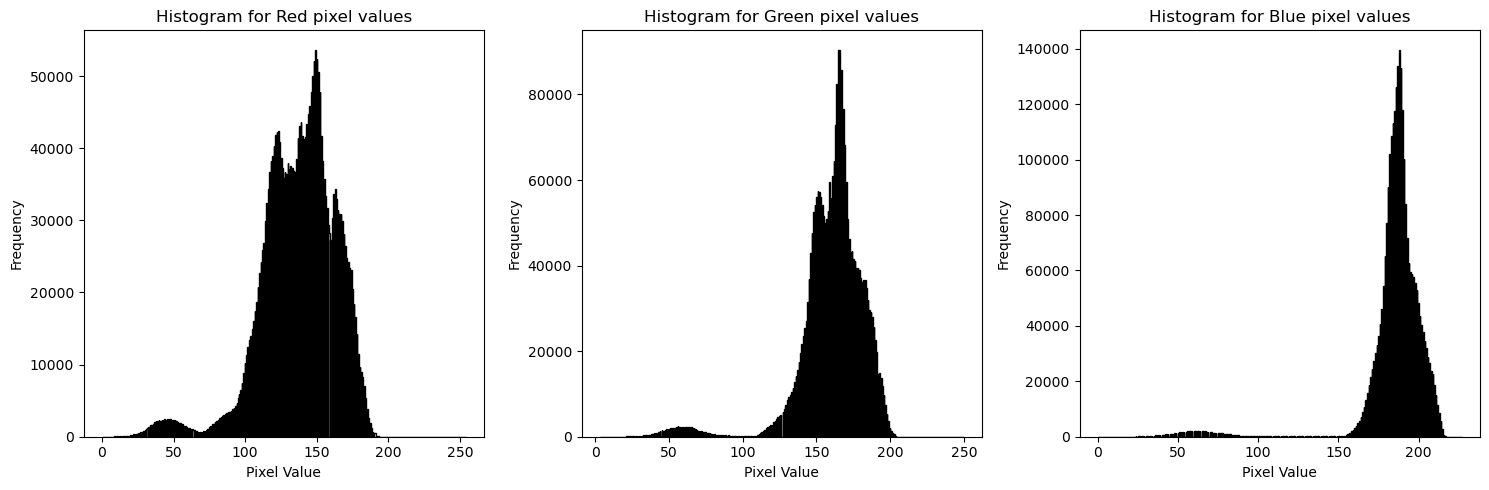

In [10]:


im = Image.open('noon_sky.jpg') # Read the image
image = np.array (im, dtype=np.float32) # Convert the image object into data array
plt.imshow(im)

Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

Images = [Red,Green,Blue]
cmaps = [red_cmap,green_cmap,blue_cmap]
name = ["Red","Green","Blue"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    axes[i].imshow(Images[i], cmap=cmaps[i])
    axes[i].axis('off')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    image_data = Images[i]
    mean = np.mean(image_data)
    std = np.std(image_data)
    var = np.var(image_data)
    median = np.median(image_data)
    rms = np.sqrt(np.mean(np.square(image_data)))
    RMS = np.sqrt(np.square(np.mean(image_data)) + np.var(image_data))

    # Seting bin 500 as to not bin the data.
    axes[i].hist(image_data.ravel(), bins=500, histtype='step', color='black')
    #axes[i].set_yscale("log")
    axes[i].set_title(f"Histogram for {name[i]} pixel values")
    axes[i].set_xlabel("Pixel Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Similarly Following is an exploration for the Night Sky

We Again See the Noise distribution as a gaussian but at the far lower pixel values between 0 to 8. This Noise is from the Thermal noise of camaera and if any light seeping through the side. 
And the information of the


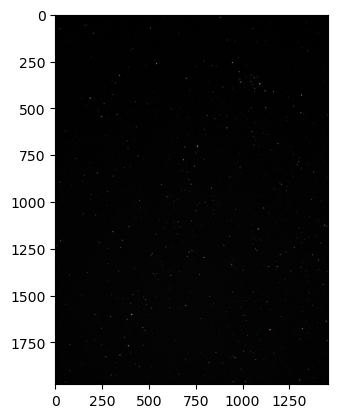

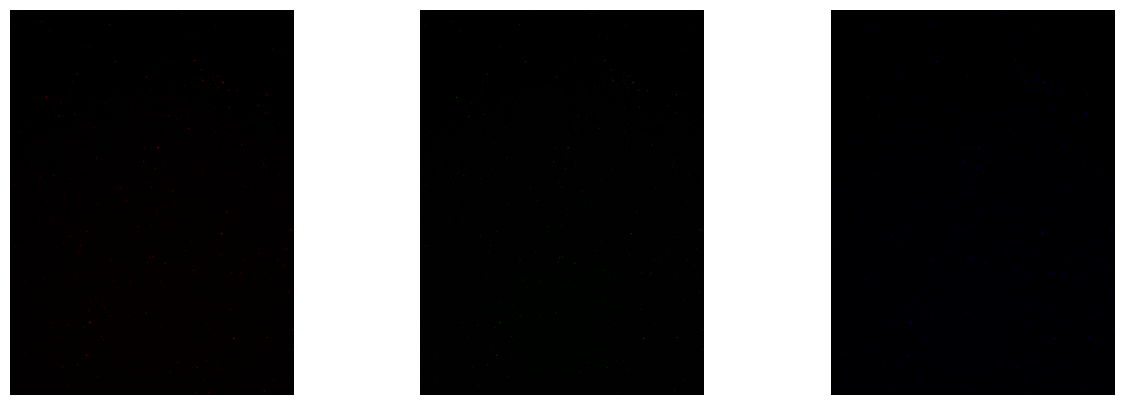

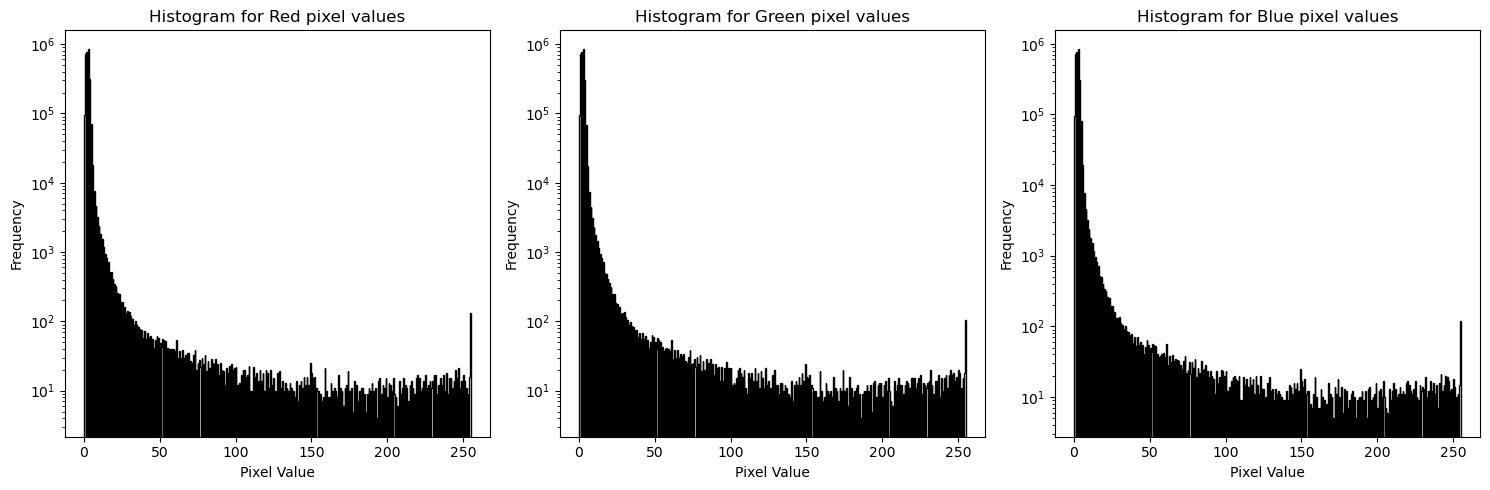

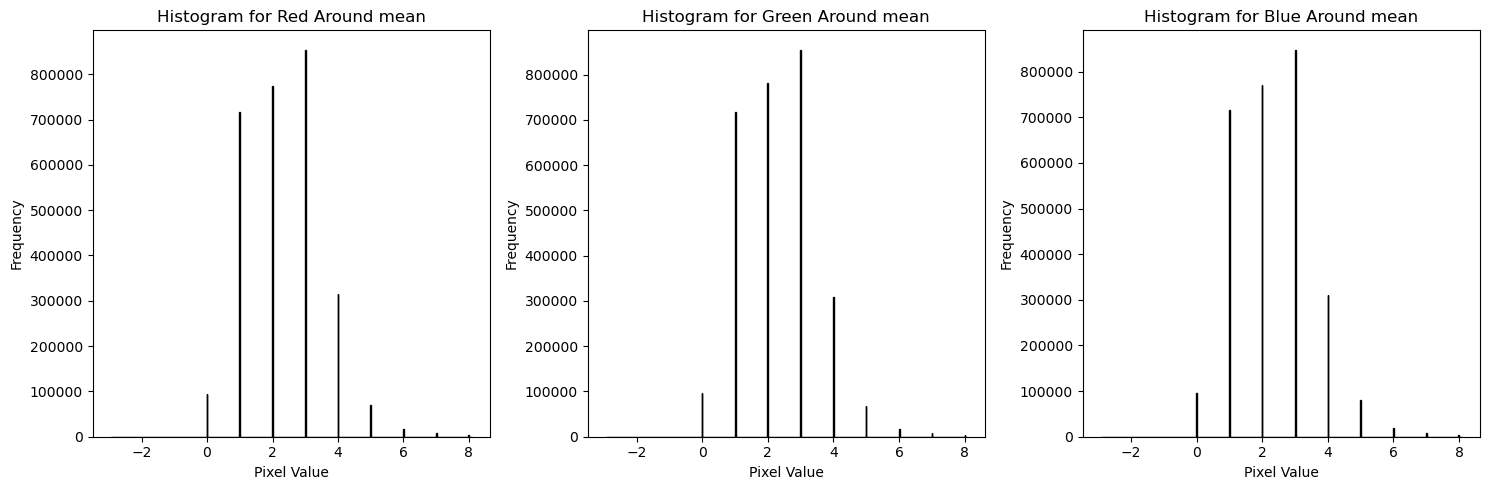

0

In [11]:

def img_analysis(im):
    image = np.array (im, dtype=np.float32) # Convert the image object into data array
    plt.imshow(im)

    Red = image[:,:,0]
    Green = image[:,:,1]
    Blue = image[:,:,2]

    Images = [Red,Green,Blue]
    cmaps = [red_cmap,green_cmap,blue_cmap]
    name = ["Red","Green","Blue"]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(0,3):
        axes[i].imshow(Images[i], cmap=cmaps[i])
        axes[i].axis('off')
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        image_data = Images[i]
        mean = np.mean(image_data)
        std = np.std(image_data)
        var = np.var(image_data)
        median = np.median(image_data)
        rms = np.sqrt(np.mean(np.square(image_data)))
        RMS = np.sqrt(np.square(np.mean(image_data)) + np.var(image_data))

        # Seting bin 500 as to not bin the data.
        axes[i].hist(image_data.ravel(), bins=500, histtype='step', color='black')
        axes[i].set_yscale("log")
        axes[i].set_title(f"Histogram for {name[i]} pixel values")
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        image_data = Images[i]
        mean = np.mean(image_data)
        std = np.std(image_data)
        var = np.var(image_data)
        median = np.median(image_data)
        rms = np.sqrt(np.mean(np.square(image_data)))
        RMS = np.sqrt(np.square(np.mean(image_data)) + np.var(image_data))

        # Setting bin 500 as to not bin the data.
        axes[i].hist(image_data.ravel(), bins=500, range=[mean - std, mean + std] ,histtype='step', color='black')
        #axes[i].set_yscale("log")
        axes[i].set_title(f"Histogram for {name[i]} Around mean")
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    return 0


im = Image.open('night_sky.jpg') 
img_analysis(im)

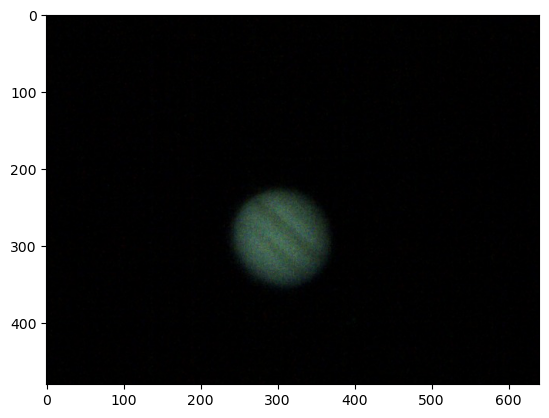

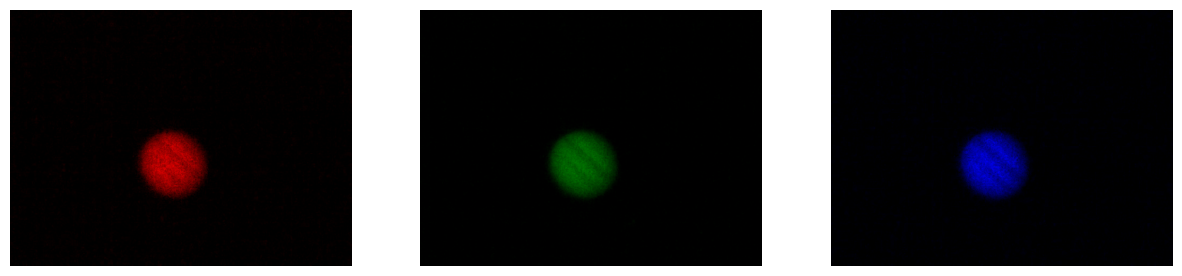

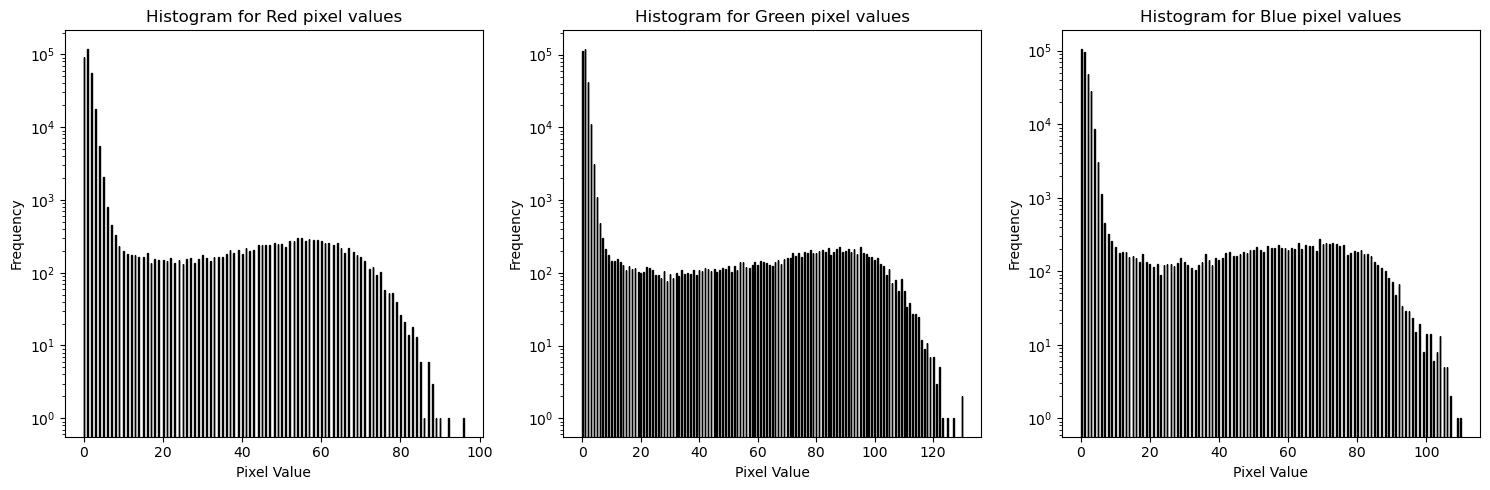

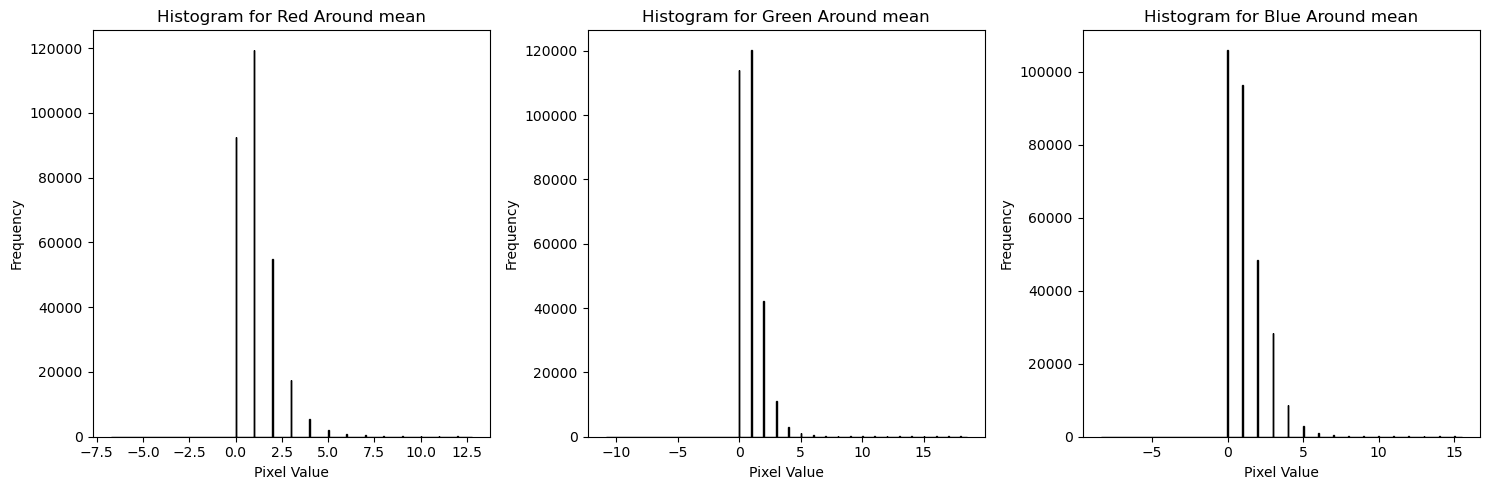

0

In [12]:
im = Image.open('jupyter.jpeg')
img_analysis(im)

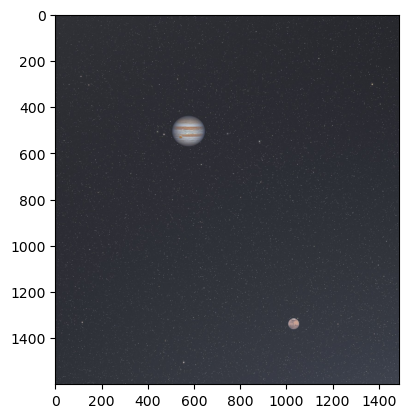

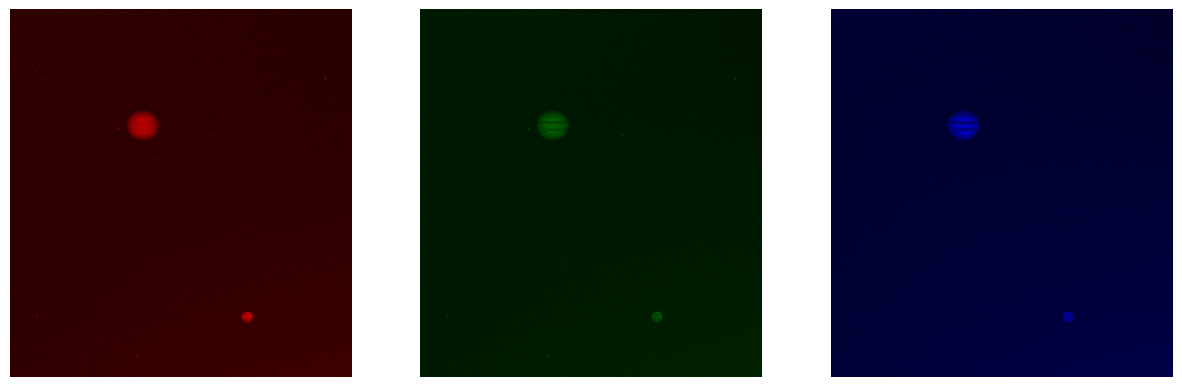

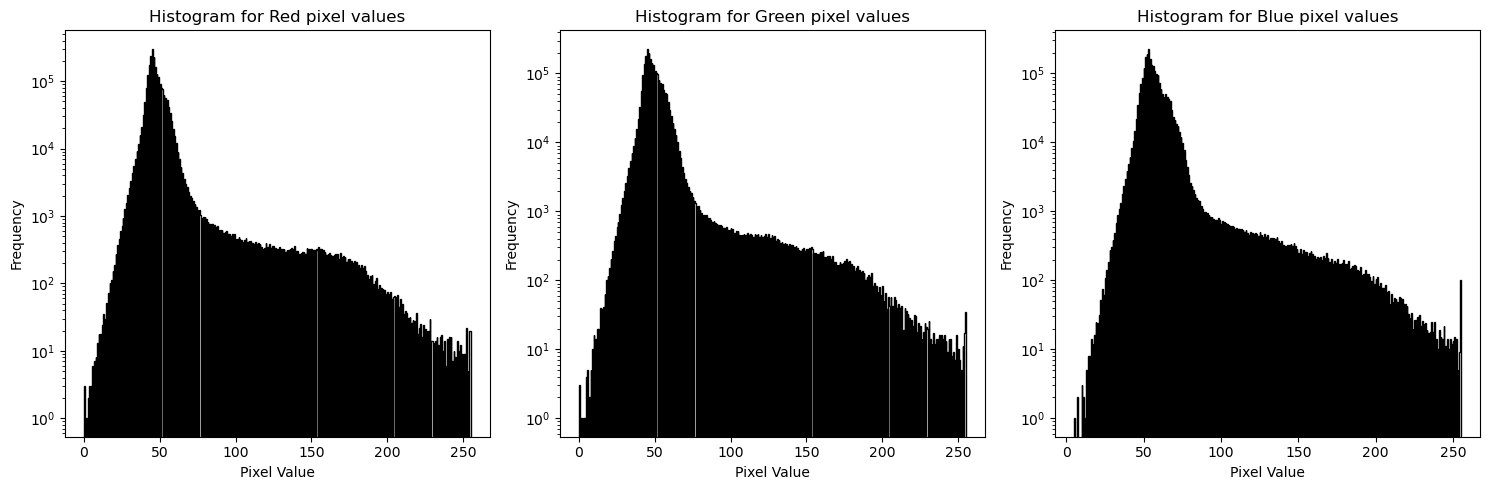

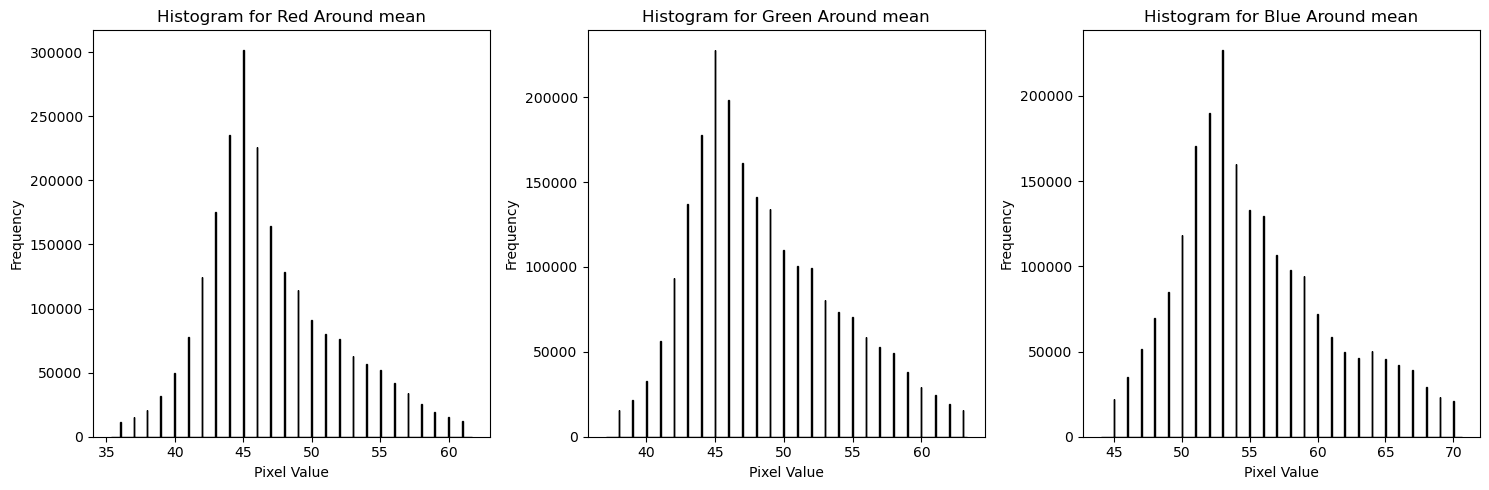

0

In [13]:

im = Image.open('jupyter_stars.jpeg') 
img_analysis(im)